In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression              # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score 
import pandas as pd

In [24]:
df = pd.read_csv('Marriage_Divorce_DB.csv')

In [26]:
df

,Age Gap,Education,Economic Similarity,Social Similarities,Cultural Similarities,Social Gap,Common Interests,Religion Compatibility,No of Children from Previous Marriage,Desire to Marry,...,Addiction,Loyalty,Height Ratio,Good Income,Self Confidence,Relation with Non-spouse Before Marriage,Spouse Confirmed by Family,Divorce in the Family of Grade 1,Start Socializing with the Opposite Sex Age,Divorce Probability
0,0.111633,1.915111,10.998678,76.456065,47.847460,50.317656,88.099898,83.738075,4.402822,22.868019,...,3.134119,49.648480,30.822948,94.499164,45.964824,2.032610,1.719332,2.262242,24.356772,2.760190
1,3.355384,2.957842,82.138120,48.656031,30.188517,54.114612,57.020971,98.408133,4.367024,40.336843,...,2.067377,75.220699,68.268221,41.102605,65.387715,1.053402,1.456192,9.795998,19.667152,1.962979
2,6.527365,2.772463,26.337826,59.356238,10.340252,76.595377,80.590985,41.743462,1.197120,45.941845,...,3.599095,22.551866,59.134874,23.053577,84.271897,8.268308,7.095241,9.986173,15.522517,2.858803
3,5.203075,1.729242,66.956033,5.472612,1.003407,55.071435,99.718078,70.493011,3.392041,2.924863,...,1.549274,99.172136,40.984117,43.400040,96.081229,5.852371,6.570749,5.099396,34.665933,1.404621
4,6.864962,4.370290,76.245035,26.797234,93.291581,73.736241,52.896199,11.729729,2.373553,89.851492,...,4.031738,21.629472,89.122381,51.615509,53.330824,9.717223,7.609152,1.294295,22.545763,1.318819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.962987,4.290912,8.386214,62.291307,54.683196,96.368597,70.819993,34.046550,4.244249,88.883882,...,3.858440,38.208996,69.785850,4.424765,89.069231,1.310490,4.791609,7.237212,25.947024,1.508494
96,0.782445,3.134205,59.812318,65.977429,75.489836,37.836755,90.947532,21.744616,4.117648,72.646174,...,2.230562,52.062020,36.438678,6.802079,68.304033,1.402042,1.393353,3.153041,36.659010,1.564502
97,4.181422,1.213900,36.880983,66.255955,75.764438,13.180621,84.961868,99.551777,1.404545,91.350428,...,4.513791,21.057973,42.934991,31.621211,87.202084,9.236842,9.636910,6.178748,16.550659,2.645653
98,3.487983,1.658356,74.237358,41.293409,12.489656,94.018496,76.700340,7.633928,3.089036,88.040777,...,1.127180,78.614687,13.793834,76.446395,54.355077,2.529191,4.424587,3.828083,19.358255,1.754198


In [25]:
print(df.columns.tolist())
print(len(df.columns.tolist()))

['Age Gap', 'Education', 'Economic Similarity', 'Social Similarities', 'Cultural Similarities', 'Social Gap', 'Common Interests', 'Religion Compatibility', 'No of Children from Previous Marriage', 'Desire to Marry', 'Independency', 'Relationship with the Spouse Family', 'Trading in', 'Engagement Time', 'Love', 'Commitment', 'Mental Health', 'The Sense of Having Children', 'Previous Trading', 'Previous Marriage', 'The Proportion of Common Genes', 'Addiction', 'Loyalty', 'Height Ratio', 'Good Income', 'Self Confidence', 'Relation with Non-spouse Before Marriage', 'Spouse Confirmed by Family', 'Divorce in the Family of Grade 1', 'Start Socializing with the Opposite Sex Age ', 'Divorce Probability']
31


In [28]:
# Psychological variables
psychological_vars = [
    'Common Interests','Love', 'Commitment', 'Mental Health', 'Self Confidence',
    'Desire to Marry', 'Loyalty', 'Addiction', 'Independency',
    'The Sense of Having Children', 'Relationship with the Spouse Family', 'Trading in', 'Previous Trading'
]

# Structural variables
structural_vars = [
    'Age Gap', 'Education', 'Economic Similarity', 'Cultural Similarities',
    'Religion Compatibility', 'Social Similarities', 'Social Gap','No of Children from Previous Marriage', 
    'Previous Marriage', 'Good Income',
    'Height Ratio', 'Engagement Time', 'Spouse Confirmed by Family',
    'The Proportion of Common Genes', 'Relation with Non-spouse Before Marriage',
    'Divorce in the Family of Grade 1', 'Start Socializing with the Opposite Sex Age '
]

print(len(psychological_vars))
print(len(structural_vars))

# Create DataFrames
df_psychological = df[psychological_vars + ['Divorce Probability']]
df_structural = df[structural_vars + ['Divorce Probability']]

13
17


In [30]:
def plot_pred(y_true, y_pred, title):
    plt.figure()
    
    # Scatter actual vs. predicted
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predictions')

    # Fit a regression line
    coeffs = np.polyfit(y_true, y_pred, deg=1)
    line = np.poly1d(coeffs)
    x_vals = np.linspace(y_true.min(), y_true.max(), 100)
    plt.plot(x_vals, line(x_vals), color='orange', linestyle='-', label='Best-fit line')

    # Labels & title
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

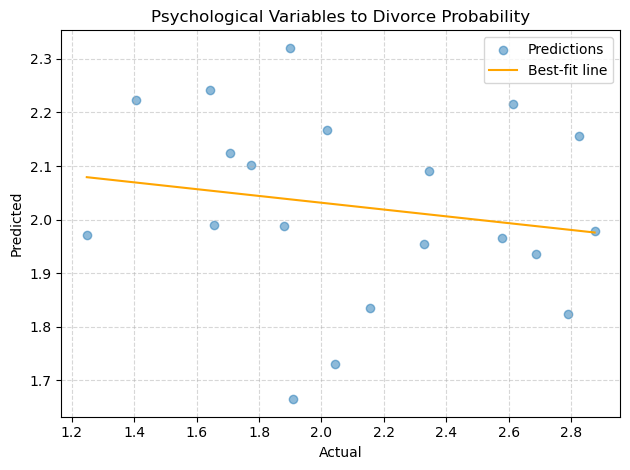

R² using all psychological variables: -0.2950473736884287


In [40]:
## run it for df_psychological first

correlations = df_psychological.corr()['Divorce Probability'].drop('Divorce Probability')

psych_x = df_psychological.drop(columns=['Divorce Probability'])
psych_y = df_psychological['Divorce Probability']

psych_x_train, psych_x_test, psych_y_train, psych_y_test = train_test_split(psych_x, psych_y, test_size = 0.2, random_state = 23)
model = LinearRegression()
model.fit(psych_x_train, psych_y_train)

psych_y_pred= model.predict(psych_x_test)

plot_pred(psych_y_test, psych_y_pred, 'Psychological Variables to Divorce Probability')


r2 = r2_score(psych_y_test, psych_y_pred)
print("R² using all psychological variables:", r2)

In [50]:
# Psych vars MSE
from sklearn.metrics import mean_squared_error
psych_mse = mean_squared_error(psych_y_test, psych_y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.2950480861335093


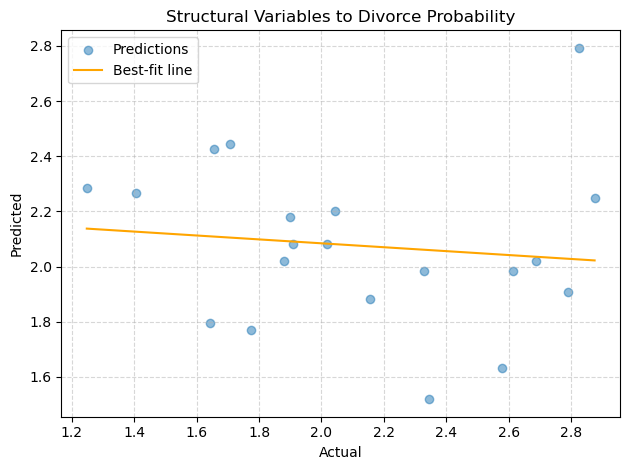

R² using all structural variables: -0.5175014331906322


In [36]:
# run it on structural vars now

correlations = df_structural.corr()['Divorce Probability'].drop('Divorce Probability')

struc_x = df_structural.drop(columns=['Divorce Probability'])
struc_y = df_structural['Divorce Probability']

struc_x_train, struc_x_test, struc_y_train, struc_y_test = train_test_split(struc_x, struc_y, test_size = 0.2, random_state = 23)
model = LinearRegression()
model.fit(struc_x_train, struc_y_train)

struc_y_pred= model.predict(struc_x_test)

plot_pred(struc_y_test, struc_y_pred, 'Structural Variables to Divorce Probability')


r2 = r2_score(struc_y_test, struc_y_pred)
print("R² using all structural variables:", r2)

In [52]:
# Structural vars MSE
from sklearn.metrics import mean_squared_error
struc_mse = mean_squared_error(struc_y_test, struc_y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.2950480861335093


In [103]:
###### WHAT IF BRO REGROUP DA VARIABLES HEHE, 3 CATEGORIES????????
# Relationship Behavior category to reflect patterns like commitment, cheating, loyalty, 
# and things that signal whether someone’s a good partner or a walking red flag (aka fuckboy energy).

##### Update: we are not doing this idea anymore, R square too low.

In [42]:
psychological_vars = [
    'Common Interests','Mental Health', 'Self Confidence', 'Desire to Marry',
    'Addiction', 'Independency', 'The Sense of Having Children'
]

structural_vars = [
    'Age Gap', 'Education', 'Economic Similarity', 'Cultural Similarities',
    'Religion Compatibility', 'Social Similarities', 'Social Gap',
    'No of Children from Previous Marriage', 'Good Income',
    'Height Ratio', 'Engagement Time', 'Spouse Confirmed by Family',
    'The Proportion of Common Genes', 'Divorce in the Family of Grade 1'
]

relationship_behavior_vars = [
    'Love', 'Commitment', 'Loyalty', 'Previous Marriage',
    'Trading in', 'Previous Trading', 'Relation with Non-spouse Before Marriage',
    'Relationship with the Spouse Family', 'Start Socializing with the Opposite Sex Age '
]


print(len(psychological_vars))
print(len(structural_vars))
print(len(relationship_behavior_vars))



# Create DataFrames
df_psychological = df[psychological_vars + ['Divorce Probability']]
df_structural = df[structural_vars + ['Divorce Probability']]
df_rb = df[relationship_behavior_vars + ['Divorce Probability']]

7
14
9



 Model for: Psychological


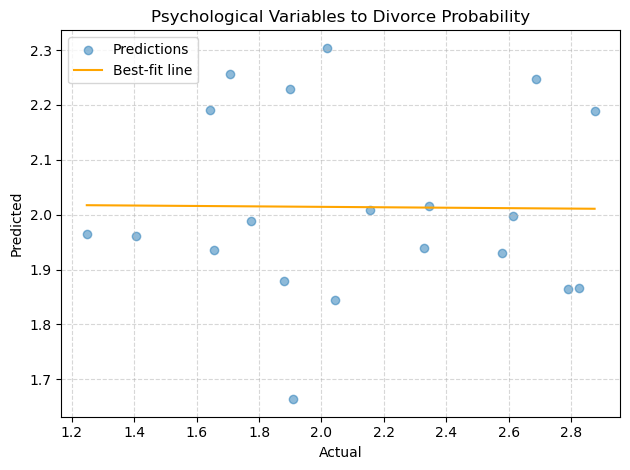

R² using psychological variables: -0.176

 Model for: Structural


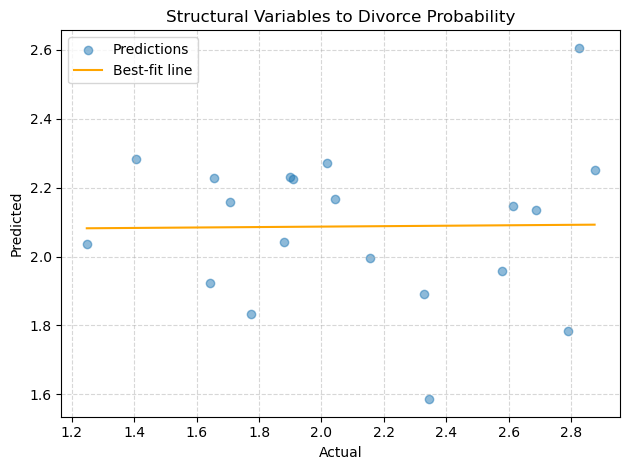

R² using structural variables: -0.2

 Model for: Relationship Behavior


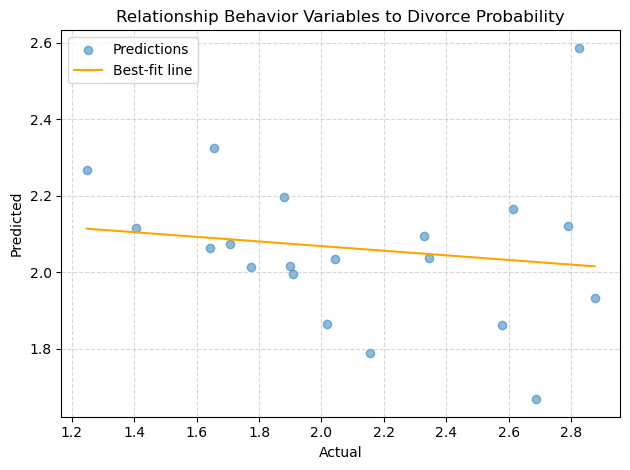

R² using relationship behavior variables: -0.302


In [44]:
# Dictionary of your existing DataFrames
groups = {
    "Psychological": df_psychological,
    "Structural": df_structural,
    "Relationship Behavior": df_rb
}

# Loop through each DataFrame and run the model
for name, df_subset in groups.items():
    print(f"\n Model for: {name}")
    
    x = df_subset.drop(columns=['Divorce Probability'])
    y = df_subset['Divorce Probability']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Plot predicted vs actual
    plot_pred(y_test, y_pred, f'{name} Variables to Divorce Probability')
    
    # R² score
    r2 = r2_score(y_test, y_pred)
    print(f"R² using {name.lower()} variables: {round(r2, 3)}")